In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
np.random.seed(42)

In [3]:
df = pd.read_csv('Diabetes_Data.csv')

In [4]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [5]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [6]:
df.rename(columns={'sudden weight loss': 'Sudden_Weight_Loss', 'weakness':'Weakness', 'Genital thrush' : 'Genital_Thrush', 'visual blurring': 'Visual_Blurring', 'delayed healing':'Delayed_Healing',
                  'partial paresis': 'Partial_Paresis', 'muscle stiffness':'Muscle_Stiffness'}, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   Sudden_Weight_Loss  520 non-null    object
 5   Weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital_Thrush      520 non-null    object
 8   Visual_Blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  Delayed_Healing     520 non-null    object
 12  Partial_Paresis     520 non-null    object
 13  Muscle_Stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [8]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
Sudden_Weight_Loss    0
Weakness              0
Polyphagia            0
Genital_Thrush        0
Visual_Blurring       0
Itching               0
Irritability          0
Delayed_Healing       0
Partial_Paresis       0
Muscle_Stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

## Feature Engineering

#### Gender

In [9]:
df['Gender'].value_counts()

Male      328
Female    192
Name: Gender, dtype: int64

In [10]:
df.groupby('Gender')['class'].value_counts(normalize=True)

Gender  class   
Female  Positive    0.901042
        Negative    0.098958
Male    Negative    0.551829
        Positive    0.448171
Name: class, dtype: float64

##### Females have higher tendency to be diabetic

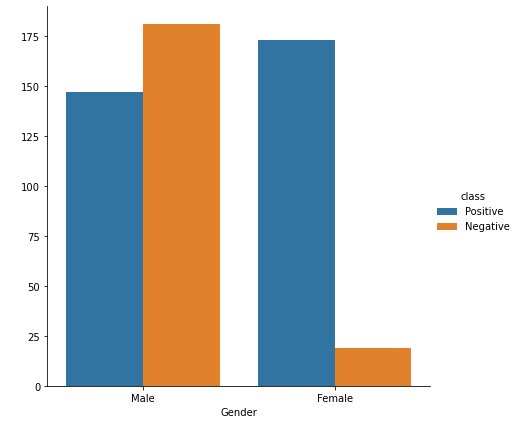

In [11]:
sns.catplot(x='Gender', kind='count', hue='class', data = df, height=6)
plt.ylabel(' ')
plt.show()

#### Polyuria

In [12]:
df['Polyuria'].value_counts()

No     262
Yes    258
Name: Polyuria, dtype: int64

In [13]:
df.groupby('Polyuria')['class'].value_counts(normalize=True)

Polyuria  class   
No        Negative    0.706107
          Positive    0.293893
Yes       Positive    0.941860
          Negative    0.058140
Name: class, dtype: float64

##### Positive Polyuria detection correlates highly with diabetes detection

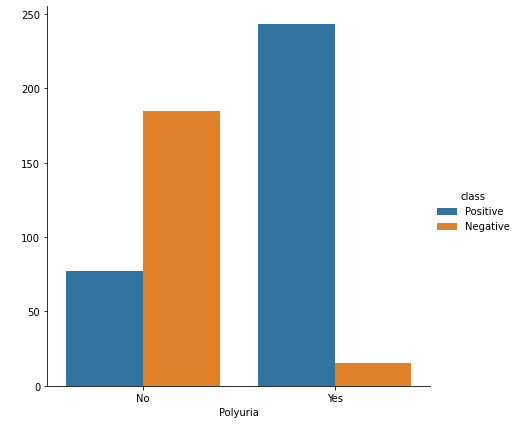

In [14]:
sns.catplot(x='Polyuria', kind='count', hue='class', data = df, height=6)
plt.ylabel(' ')
plt.show()

#### Polydipsia

In [15]:
df['Polydipsia'].value_counts()

No     287
Yes    233
Name: Polydipsia, dtype: int64

In [16]:
df.groupby('Polydipsia')['class'].value_counts(normalize=True)

Polydipsia  class   
No          Negative    0.668990
            Positive    0.331010
Yes         Positive    0.965665
            Negative    0.034335
Name: class, dtype: float64

##### Positive Polydipsia detection correlates highly with diabetes detection

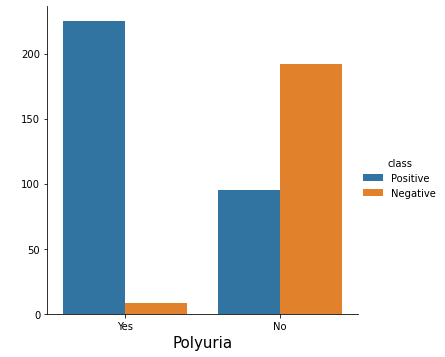

In [17]:
sns.catplot(x='Polydipsia', kind='count', hue='class', data = df, height=5)
plt.ylabel(' ')
plt.xlabel('Polyuria', size = 15)
plt.show()

#### Sudden Weight Loss

In [18]:
df['Sudden_Weight_Loss'].value_counts()

No     303
Yes    217
Name: Sudden_Weight_Loss, dtype: int64

In [19]:
df.groupby('Sudden_Weight_Loss')['class'].value_counts(normalize=True)

Sudden_Weight_Loss  class   
No                  Negative    0.564356
                    Positive    0.435644
Yes                 Positive    0.866359
                    Negative    0.133641
Name: class, dtype: float64

##### Sudden weight loss could be a major symptom of diabetes

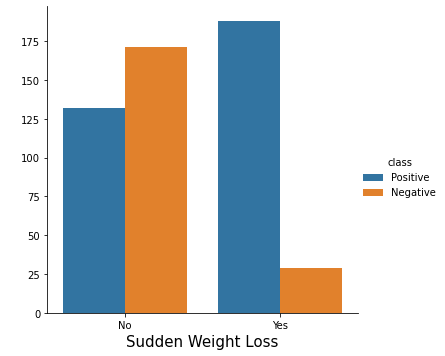

In [20]:
sns.catplot(x='Sudden_Weight_Loss', kind='count', hue='class', data = df, height=5)
plt.ylabel(' ')
plt.xlabel('Sudden Weight Loss', size = 15)
plt.show()

#### Polyphagia

In [21]:
df['Polyphagia'].value_counts()

No     283
Yes    237
Name: Polyphagia, dtype: int64

In [22]:
df.groupby('Polyphagia')['class'].value_counts(normalize=True)

Polyphagia  class   
No          Negative    0.537102
            Positive    0.462898
Yes         Positive    0.797468
            Negative    0.202532
Name: class, dtype: float64

##### Symptoms of Polyphagia could be a major symptom of diabetes

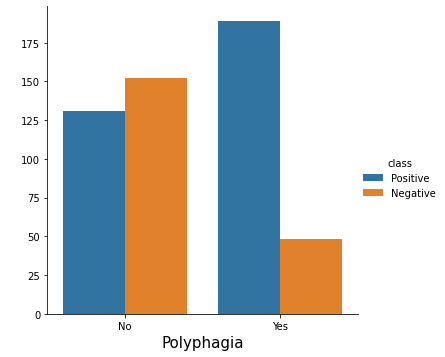

In [23]:
sns.catplot(x='Polyphagia', kind='count', hue='class', data = df, height=5)
plt.ylabel(' ')
plt.xlabel('Polyphagia', size = 15)
plt.show()

#### Genital Thrush

In [24]:
df['Genital_Thrush'].value_counts()

No     404
Yes    116
Name: Genital_Thrush, dtype: int64

In [25]:
df.groupby('Genital_Thrush')['class'].value_counts(normalize=True)

Genital_Thrush  class   
No              Positive    0.586634
                Negative    0.413366
Yes             Positive    0.715517
                Negative    0.284483
Name: class, dtype: float64

##### Genital Thrush could be a major symptom as well

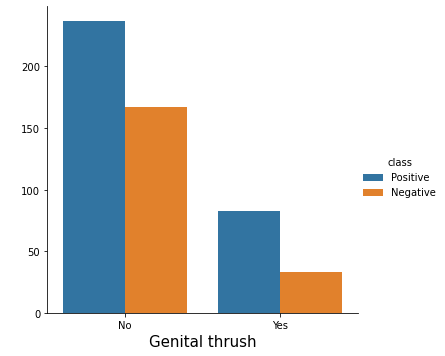

In [26]:
sns.catplot(x='Genital_Thrush', kind='count', hue='class', data = df, height=5)
plt.ylabel(' ')
plt.xlabel('Genital thrush', size = 15)
plt.show()

#### Visual Blurring

In [27]:
df['Visual_Blurring'].value_counts()

No     287
Yes    233
Name: Visual_Blurring, dtype: int64

In [28]:
df.groupby('Visual_Blurring')['class'].value_counts(normalize=True)

Visual_Blurring  class   
No               Positive    0.505226
                 Negative    0.494774
Yes              Positive    0.751073
                 Negative    0.248927
Name: class, dtype: float64

##### Blurred visuals may be a symptom of Diabetes too

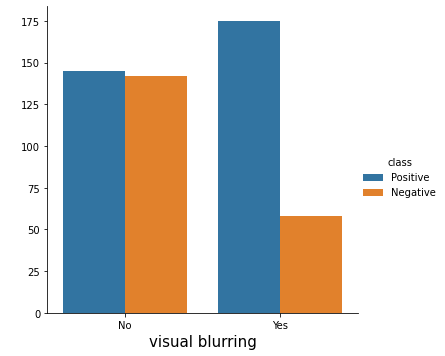

In [29]:
sns.catplot(x='Visual_Blurring', kind='count', hue='class', data = df, height=5)
plt.ylabel(' ')
plt.xlabel('visual blurring', size = 15)
plt.show()

#### Itching

In [30]:
df['Itching'].value_counts()

No     267
Yes    253
Name: Itching, dtype: int64

In [31]:
df.groupby('Itching')['class'].value_counts(normalize=True)

Itching  class   
No       Positive    0.621723
         Negative    0.378277
Yes      Positive    0.608696
         Negative    0.391304
Name: class, dtype: float64

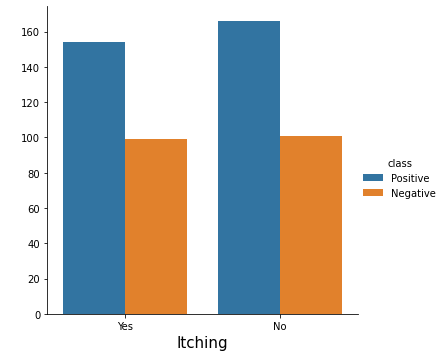

In [32]:
sns.catplot(x='Itching', kind='count', hue='class', data = df, height=5)
plt.ylabel(' ')
plt.xlabel('Itching', size = 15)
plt.show()

#### Irritability

In [33]:
df['Irritability'].value_counts()

No     394
Yes    126
Name: Irritability, dtype: int64

In [34]:
df.groupby('Irritability')['class'].value_counts(normalize=True)

Irritability  class   
No            Positive    0.532995
              Negative    0.467005
Yes           Positive    0.873016
              Negative    0.126984
Name: class, dtype: float64

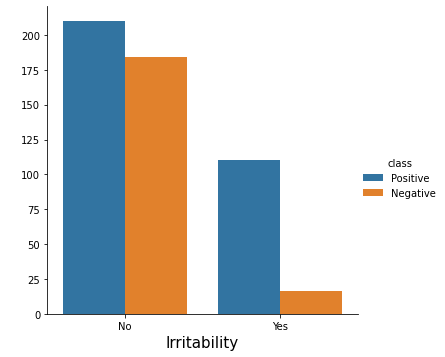

In [35]:
sns.catplot(x='Irritability', kind='count', hue='class', data = df, height=5)
plt.ylabel(' ')
plt.xlabel('Irritability', size = 15)
plt.show()

#### Delayed Healing

In [36]:
df['Delayed_Healing'].value_counts()

No     281
Yes    239
Name: Delayed_Healing, dtype: int64

In [37]:
df.groupby('Delayed_Healing')['class'].value_counts(normalize=True)

Delayed_Healing  class   
No               Positive    0.594306
                 Negative    0.405694
Yes              Positive    0.640167
                 Negative    0.359833
Name: class, dtype: float64

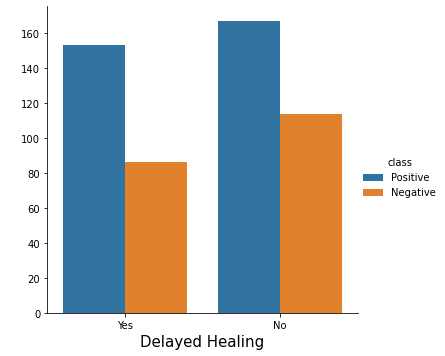

In [38]:
sns.catplot(x='Delayed_Healing', kind='count', hue='class', data = df, height=5)
plt.ylabel(' ')
plt.xlabel('Delayed Healing', size = 15)
plt.show()

#### Partial Paresis

In [39]:
df['Partial_Paresis'].value_counts()

No     296
Yes    224
Name: Partial_Paresis, dtype: int64

In [40]:
df.groupby('Partial_Paresis')['class'].value_counts(normalize=True)

Partial_Paresis  class   
No               Negative    0.567568
                 Positive    0.432432
Yes              Positive    0.857143
                 Negative    0.142857
Name: class, dtype: float64

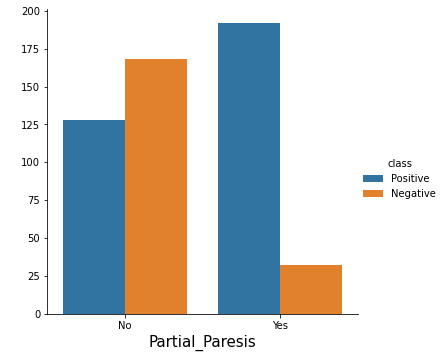

In [41]:
sns.catplot(x='Partial_Paresis', kind='count', hue='class', data = df, height=5)
plt.ylabel(' ')
plt.xlabel('Partial_Paresis', size = 15)
plt.show()

#### Muscle Stiffness

In [42]:
df['Muscle_Stiffness'].value_counts()

No     325
Yes    195
Name: Muscle_Stiffness, dtype: int64

In [43]:
df.groupby('Muscle_Stiffness')['class'].value_counts(normalize=True)

Muscle_Stiffness  class   
No                Positive    0.569231
                  Negative    0.430769
Yes               Positive    0.692308
                  Negative    0.307692
Name: class, dtype: float64

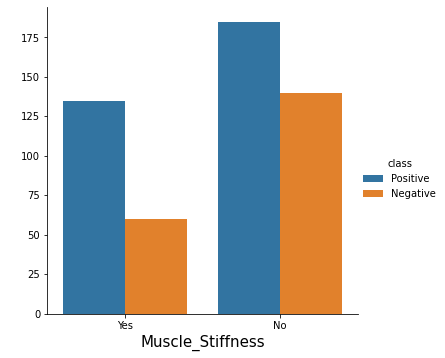

In [44]:
sns.catplot(x='Muscle_Stiffness', kind='count', hue='class', data = df, height=5)
plt.ylabel(' ')
plt.xlabel('Muscle_Stiffness', size = 15)
plt.show()

#### Alopecia

In [45]:
df['Alopecia'].value_counts()

No     341
Yes    179
Name: Alopecia, dtype: int64

In [46]:
df.groupby('Alopecia')['class'].value_counts(normalize=True)

Alopecia  class   
No        Positive    0.709677
          Negative    0.290323
Yes       Negative    0.564246
          Positive    0.435754
Name: class, dtype: float64

##### Patients without Alopecia have high tendencies to be diabetic 

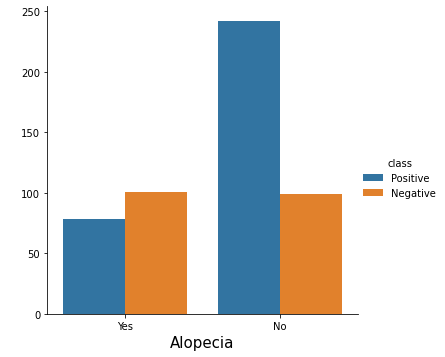

In [47]:
sns.catplot(x='Alopecia', kind='count', hue='class', data = df, height=5)
plt.ylabel(' ')
plt.xlabel('Alopecia', size = 15)
plt.show()

#### Obesity

In [48]:
df['Obesity'].value_counts()

No     432
Yes     88
Name: Obesity, dtype: int64

In [49]:
df.groupby('Obesity')['class'].value_counts(normalize=True)

Obesity  class   
No       Positive    0.599537
         Negative    0.400463
Yes      Positive    0.693182
         Negative    0.306818
Name: class, dtype: float64

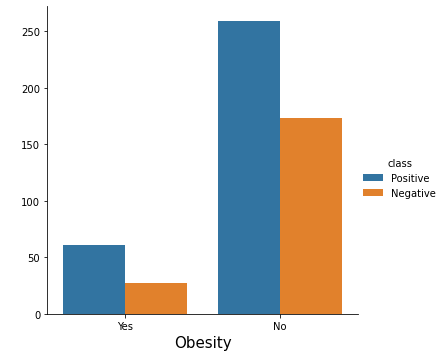

In [50]:
sns.catplot(x='Obesity', kind='count', hue='class', data = df, height=5)
plt.ylabel(' ')
plt.xlabel('Obesity', size = 15)
plt.show()

### Age

In [51]:
df_age = df[['Age', 'class']]
df_age.head()

,Age,class
0,40,Positive
1,58,Positive
2,41,Positive
3,45,Positive
4,60,Positive


In [52]:
df_age['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

In [53]:
print('Maximum Age: ', df_age["Age"].max())
print('Minimum Age: ', df_age["Age"].min())

Maximum Age:  90
Minimum Age:  16


In [54]:
df_age.replace({'Male': 1, 'Female': 0, 'Positive': 1, 'Negative':0, 'Yes':1, 'No':0}, inplace=True)

In [55]:
df_age = df_age[['Age', 'class']]
df_age

bins = np.arange(20, 100, 10)
age_grade = df_age.groupby(pd.cut(df_age['Age'], bins)).mean()

age_grade = age_grade.sort_values(by='class', ascending=False)
age_grade

,Age,class
Age,,
"(80, 90]",87.500000,1.000000
"(60, 70]",65.545455,0.742424
"(30, 40]",36.829268,0.682927
"(50, 60]",55.748031,0.614173
"(40, 50]",46.048276,0.600000
"(20, 30]",28.840909,0.318182
"(70, 80]",72.700000,0.300000


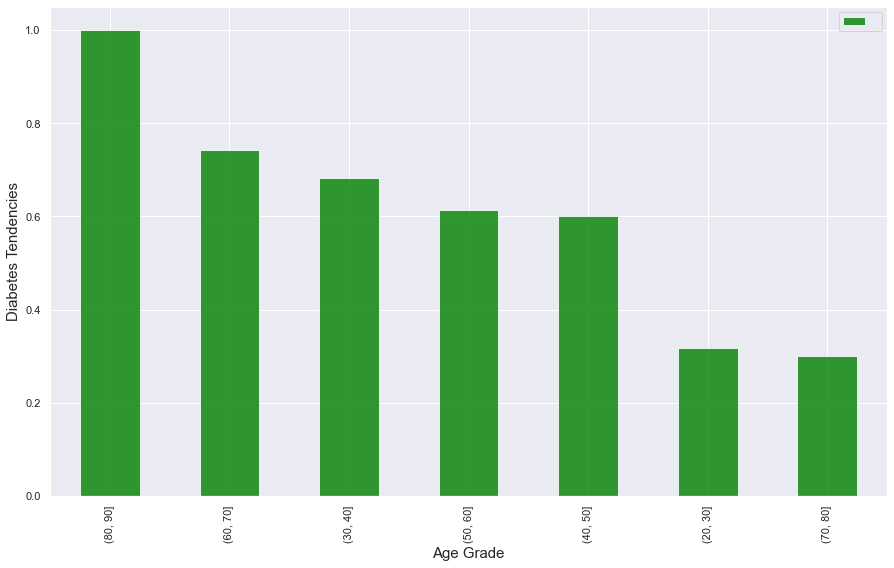

In [56]:
sns.set(rc={'figure.figsize' :(15,9)})
age_grade.drop(columns=['Age']).plot(kind='bar', color='green', alpha=0.80)
plt.ylabel('Diabetes Tendencies', size=15)
plt.xlabel('Age Grade', size=15)
plt.legend(' ')
plt.show()

#### Patients with old age greater than 80 years have high tendency to be diabetic. 60<Age grade<70 also had a high tendency
#### Followed by 30<Age grade<40 which may be as a result of lifestyle.  

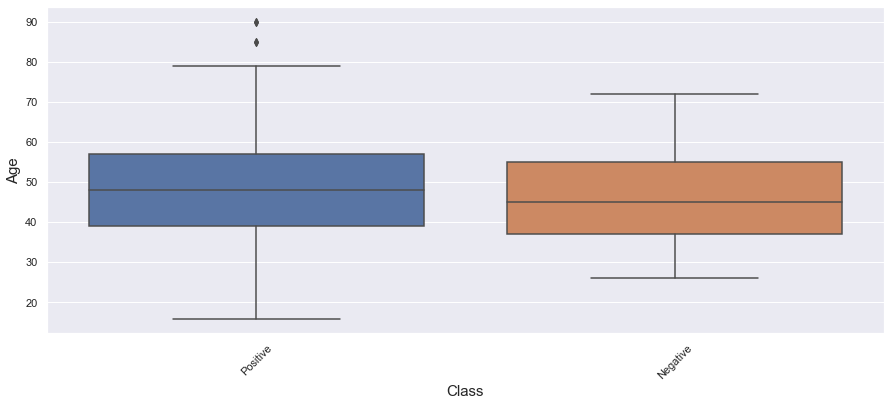

In [57]:
sns.set(rc={'figure.figsize':(15,6)})
ax=sns.boxplot(x='class', y='Age', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.ylabel('Age', size=15)
plt.xlabel('Class', size=15)
plt.show()

##### Apply label encoding to the dataset since its a binary classification

In [58]:
# Use label encoding since its a binary classification
df.replace({'Male': 1, 'Female': 0, 'Positive': 1, 'Negative':0, 'Yes':1, 'No':0}, inplace=True)

In [59]:
df.head()

,Age,Gender,Polyuria,Polydipsia,Sudden_Weight_Loss,Weakness,Polyphagia,Genital_Thrush,Visual_Blurring,Itching,Irritability,Delayed_Healing,Partial_Paresis,Muscle_Stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [60]:
df.corr()

,Age,Gender,Polyuria,Polydipsia,Sudden_Weight_Loss,Weakness,Polyphagia,Genital_Thrush,Visual_Blurring,Itching,Irritability,Delayed_Healing,Partial_Paresis,Muscle_Stiffness,Alopecia,Obesity,class
Age,1.000000,0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
Gender,0.062872,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396,-0.449233
Polyuria,0.199781,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
Polydipsia,0.137382,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
Sudden_Weight_Loss,0.064808,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
Weakness,0.224596,-0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
Polyphagia,0.315577,-0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
Genital_Thrush,0.096519,0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
Visual_Blurring,0.402729,-0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
Itching,0.296559,-0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


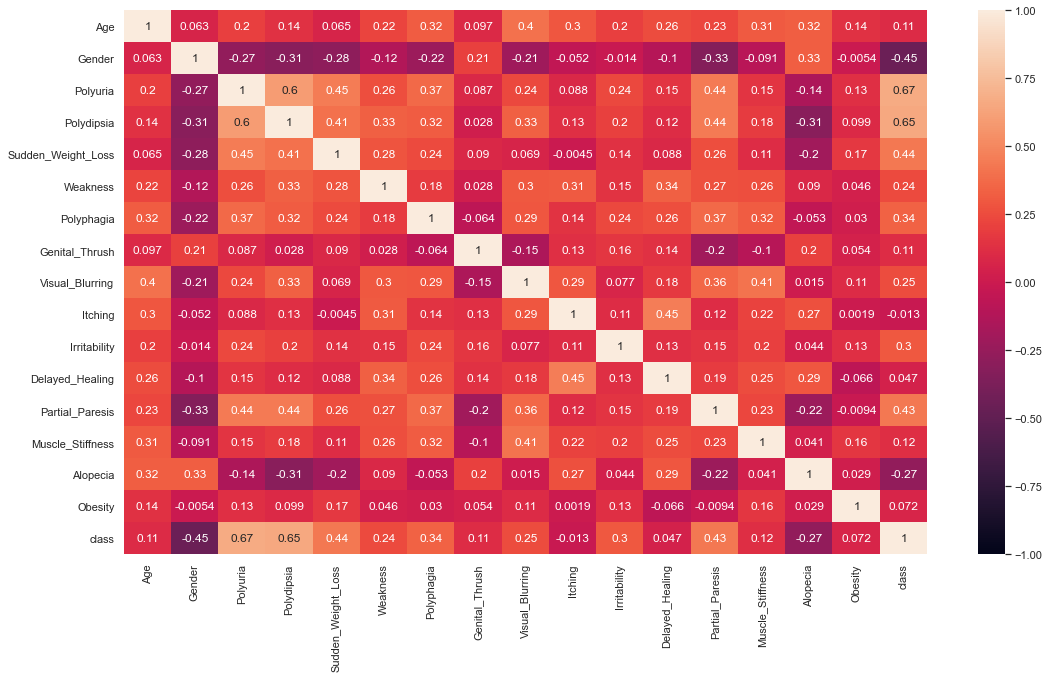

In [61]:
plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

## Validation

In [62]:
df_features = df.iloc[:, :16].values

df_target = df.iloc[:, -1].values

In [63]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
df_features_scaled = scaler.fit_transform(df_features)
df_features_scaled

array([[-0.6613669 ,  0.76509206, -0.99233705, ...,  1.29099445,
         1.38022749,  2.21564684],
       [ 0.82136224,  0.76509206, -0.99233705, ..., -0.77459667,
         1.38022749, -0.45133547],
       [-0.57899306,  0.76509206,  1.00772212, ...,  1.29099445,
         1.38022749, -0.45133547],
       ...,
       [ 0.82136224, -1.30703226,  1.00772212, ...,  1.29099445,
        -0.72451824,  2.21564684],
       [-1.32035762, -1.30703226, -0.99233705, ..., -0.77459667,
         1.38022749, -0.45133547],
       [-0.49661921,  0.76509206, -0.99233705, ..., -0.77459667,
        -0.72451824, -0.45133547]])

In [64]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(df_features_scaled, df_target, train_size=0.8, random_state=42)

In [65]:
training_inputs

array([[ 0.40949304,  0.76509206,  1.00772212, ..., -0.77459667,
         1.38022749, -0.45133547],
       [-0.57899306,  0.76509206,  1.00772212, ..., -0.77459667,
        -0.72451824,  2.21564684],
       [ 0.49186688,  0.76509206, -0.99233705, ..., -0.77459667,
         1.38022749, -0.45133547],
       ...,
       [-0.6613669 , -1.30703226,  1.00772212, ...,  1.29099445,
        -0.72451824, -0.45133547],
       [ 0.7389884 ,  0.76509206,  1.00772212, ..., -0.77459667,
        -0.72451824, -0.45133547],
       [ 3.45732515, -1.30703226, -0.99233705, ...,  1.29099445,
         1.38022749, -0.45133547]])

In [66]:
from sklearn.tree import DecisionTreeClassifier

clf= DecisionTreeClassifier(random_state=42)

# Train the classifier on the training set
clf.fit(training_inputs, training_classes)
# Measure the accuracy
print(clf.score(testing_inputs, testing_classes))

0.9519230769230769


In [67]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, random_state=1)

# Train the classifier on the training set
clf.fit(training_inputs, training_classes)
# Measure the accuracy
print(clf.score(testing_inputs, testing_classes))

0.9903846153846154


In [68]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='rbf', C=C)

# Train the classifier on the training set
svc.fit(training_inputs, training_classes)
# Measure the accuracy
svc.score(testing_inputs, testing_classes)

0.9903846153846154

In [69]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=10)

# Train the classifier on the training set
clf.fit(training_inputs, training_classes)
# Measure the accuracy
clf.score(testing_inputs, testing_classes)

0.875

In [70]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

# Train the classifier on the training set
clf.fit(training_inputs, training_classes)
# Measure the accuracy
clf.score(testing_inputs, testing_classes)

0.9230769230769231

In [71]:
from sklearn.ensemble import ExtraTreesClassifier
clf =ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training set
clf.fit(training_inputs, training_classes)
# Measure the accuracy
clf.score(testing_inputs, testing_classes)

0.9903846153846154

In [72]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training set
clf.fit(training_inputs, training_classes)
# Measure the accuracy
clf.score(testing_inputs, testing_classes)

0.9903846153846154

In [73]:
y_pred = clf.predict(testing_inputs)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testing_classes, y_pred)
cm

array([[33,  0],
       [ 1, 70]], dtype=int64)

In [75]:
testing_inputs[:, 0].shape

(104,)

In [76]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [77]:
testing_classes

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

#### Regression Models needed to predict Diabetic Tendencies (Probabilities)

In [78]:
# import important metric libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [79]:
from sklearn.ensemble import ExtraTreesRegressor
et =ExtraTreesRegressor(random_state=1)

# Train the classifier on the training set
et.fit(training_inputs, training_classes)

# Predict the model
pred_et = et.predict(testing_inputs)

#mean square error
#pred_dt = regressor.predict(X_pre_test)
et_mse = mean_squared_error(testing_classes, pred_et)
et_rmse = np.sqrt(et_mse)

#mean absolute error
et_mae = mean_absolute_error(testing_classes, pred_et)


# r2 score
et_r2 = r2_score(testing_classes, pred_et)


print('Extra Tree Regression. mean_squared_error: ', et_rmse)
print('Extra Tree Regression. mean_absolute_error: ', et_mae)
print('Extra Tree Regression. r2_score: ', et_r2)

#pred_et

Extra Tree Regression. mean_squared_error:  0.14582325972533694
Extra Tree Regression. mean_absolute_error:  0.03278846153846154
Extra Tree Regression. r2_score:  0.9018369611609048


In [80]:
from sklearn.ensemble import RandomForestRegressor

rand = RandomForestRegressor(random_state=1)

# Train the classifier on the training set
rand.fit(training_inputs, training_classes)

# Predict the model
pred_rf = rand.predict(testing_inputs)

#mean square error
#pred_dt = regressor.predict(X_pre_test)
rd_mse = mean_squared_error(testing_classes, pred_rf)
rd_rmse = np.sqrt(rd_mse)

#mean absolute error
rd_mae = mean_absolute_error(testing_classes, pred_rf)


# r2 score
rd_r2 = r2_score(testing_classes, pred_rf)


print('Random Forest Regression. mean_squared_error: ', rd_rmse)
print('Random Forest Regression. mean_absolute_error: ', rd_mae)
print('Random Forest Regression. r2_score: ', rd_r2)

#pred_rf

Random Forest Regression. mean_squared_error:  0.1384217357320624
Random Forest Regression. mean_absolute_error:  0.051250000000000004
Random Forest Regression. r2_score:  0.911548954332053


In [81]:
from sklearn import svm

C = 1.0
svr = svm.SVR(kernel='rbf', C=C)

# Train the classifier on the training set
svr.fit(training_inputs, training_classes)
# Measure the accuracy
svr.score(testing_inputs, testing_classes)

# Predict the model
pred_svr = svr.predict(testing_inputs)

#mean square error
#pred_dt = regressor.predict(X_pre_test)
svr_mse = mean_squared_error(testing_classes, pred_svr)
svr_rmse = np.sqrt(svr_mse)

#mean absolute error
svr_mae = mean_absolute_error(testing_classes, pred_svr)


# r2 score
svr_r2 = r2_score(testing_classes, pred_svr)


print('SVR. mean_squared_error: ', svr_rmse)
print('SVR. mean_absolute_error: ', svr_mae)
print('SVR. r2_score: ', svr_r2)

#pred_svr

SVR. mean_squared_error:  0.1608643639317102
SVR. mean_absolute_error:  0.1108467372710835
SVR. r2_score:  0.8805423183118265


In [82]:
# Fitting gradient boosting regression model to the dataset

from sklearn.ensemble import GradientBoostingRegressor

grad = GradientBoostingRegressor(random_state=1)

# Train the classifier on the training set
grad.fit(training_inputs, training_classes)

# Predict the model
pred_gd = grad.predict(testing_inputs)

#mean square error
#pred_dt = regressor.predict(X_pre_test)
gd_mse = mean_squared_error(testing_classes, pred_gd)
gd_rmse = np.sqrt(gd_mse)

#mean absolute error
gd_mae = mean_absolute_error(testing_classes, pred_gd)


# r2 score
gd_r2 = r2_score(testing_classes, pred_gd)


print('Gradient Boost Regression. mean_squared_error: ', gd_rmse)
print('Gradient Boost Regression. mean_absolute_error: ', gd_mae)
print('Gradient Boost Regression. r2_score: ', gd_r2)

Gradient Boost Regression. mean_squared_error:  0.17670144957569445
Gradient Boost Regression. mean_absolute_error:  0.10313917109890401
Gradient Boost Regression. r2_score:  0.8558632867760338


## Fine-tune your model

In [83]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [84]:
from sklearn.model_selection import cross_val_score

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

forest_scores = cross_val_score(forest_reg, df_features_scaled, df_target,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.22496154 0.18299853 0.16643895 0.12611808 0.34526745 0.02201398
 0.34200765 0.05408327 0.04881283 0.09159904]
Mean: 0.16043013122893915
Standard deviation: 0.10985768728406688


In [85]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=600),
    
    }

forest_reg = RandomForestRegressor(max_features=2, random_state=1)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=1)
rnd_search.fit(training_inputs, training_classes)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_features=2,
                                                   random_state=1),
                   param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000000D30A09128>},
                   random_state=1, scoring='neg_mean_squared_error')

In [86]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.1503013656164835 {'n_estimators': 38}
0.1478892624944955 {'n_estimators': 236}
0.1491239345333303 {'n_estimators': 73}
0.14868859856464225 {'n_estimators': 145}
0.1503515114638367 {'n_estimators': 130}
0.14756057088335953 {'n_estimators': 584}
0.14793369982108787 {'n_estimators': 509}
0.14823473186031394 {'n_estimators': 391}
0.1470473817548751 {'n_estimators': 282}
0.14832255511871678 {'n_estimators': 179}


In [87]:
best_estimator = rnd_search.best_estimator_
best_estimator

RandomForestRegressor(max_features=2, n_estimators=282, random_state=1)

In [88]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([0.1105972 , 0.09289278, 0.18085389, 0.14804938, 0.07128732,
       0.02964048, 0.03635925, 0.02656926, 0.03713344, 0.03508044,
       0.04289252, 0.03407672, 0.05868003, 0.03156112, 0.04626079,
       0.01806538])

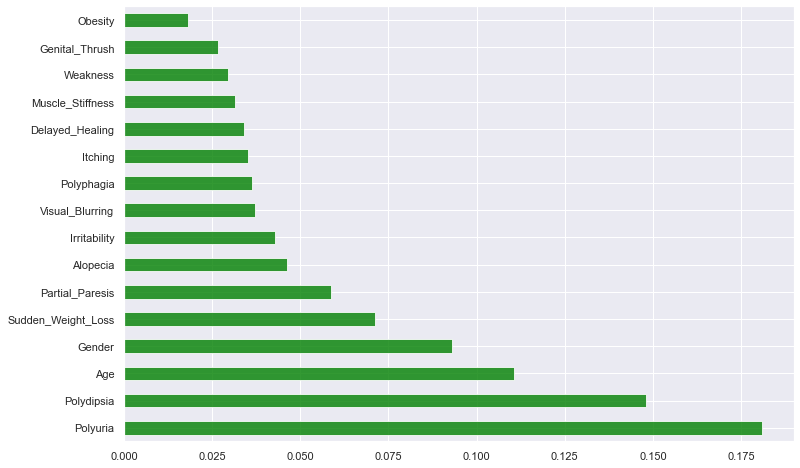

In [89]:
#Plot a visualization for the Feature Importance Strengths

plt.figure(figsize = (12,8))
feat_importances = pd.Series(feature_importances, index=df.columns[:16])
feat_importances.nlargest(16).plot(kind='barh', alpha=0.8, color='Green')
plt.show()


##### Polyuria, Polydipsia, Age, Gender and Sudden weight loss,  proves to be major contributing factors to diabetes detection

In [90]:
from sklearn.ensemble import RandomForestRegressor

rand2 = RandomForestRegressor(max_features=2, n_estimators=282, random_state=1)

# Train the classifier on the training set
rand2.fit(training_inputs, training_classes)

# Predict the model
pred_rf = rand2.predict(testing_inputs)

#mean square error
#pred_dt = regressor.predict(X_pre_test)
rd_mse = mean_squared_error(testing_classes, pred_rf)
rd_rmse = np.sqrt(rd_mse)

#mean absolute error
rd_mae = mean_absolute_error(testing_classes, pred_rf)


# r2 score
rd_r2 = r2_score(testing_classes, pred_rf)


print('Random Forest Regression. mean_squared_error: ', rd_rmse)
print('Random Forest Regression. mean_absolute_error: ', rd_mae)
print('Random Forest Regression. r2_score: ', rd_r2)

#pred_rf

Random Forest Regression. mean_squared_error:  0.12888638482427792
Random Forest Regression. mean_absolute_error:  0.06645526459356246
Random Forest Regression. r2_score:  0.923315343880382


#### Compute 95% confidence interval on the RMSE value

In [91]:
from scipy import stats

confidence = 0.95
squared_errors = (pred_rf - testing_classes) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([0.09276678, 0.15690037])

In [92]:
import pickle
# open a file, where you ant to store the data
file = open('diabet_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rand2, file)

In [93]:
model = open('diabet_rf.pkl','rb')
forest = pickle.load(model)

In [94]:
print(forest.predict([[18, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]]))

[0.25531915]


#### Irrespective of the age and gender, symptoms such as Polyuria, Polydipsia, Sudden Weight Loss, Visual Bearing seems to be the overriding factor

In [95]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'Sudden_Weight_Loss',
       'Weakness', 'Polyphagia', 'Genital_Thrush', 'Visual_Blurring',
       'Itching', 'Irritability', 'Delayed_Healing', 'Partial_Paresis',
       'Muscle_Stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')